<a href="https://colab.research.google.com/github/character-cc/ID3/blob/main/Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.8083333333333333
Chiều cao của cây: 13
Số lượng nút lá: 81
Số lượng nút trong cây: 161


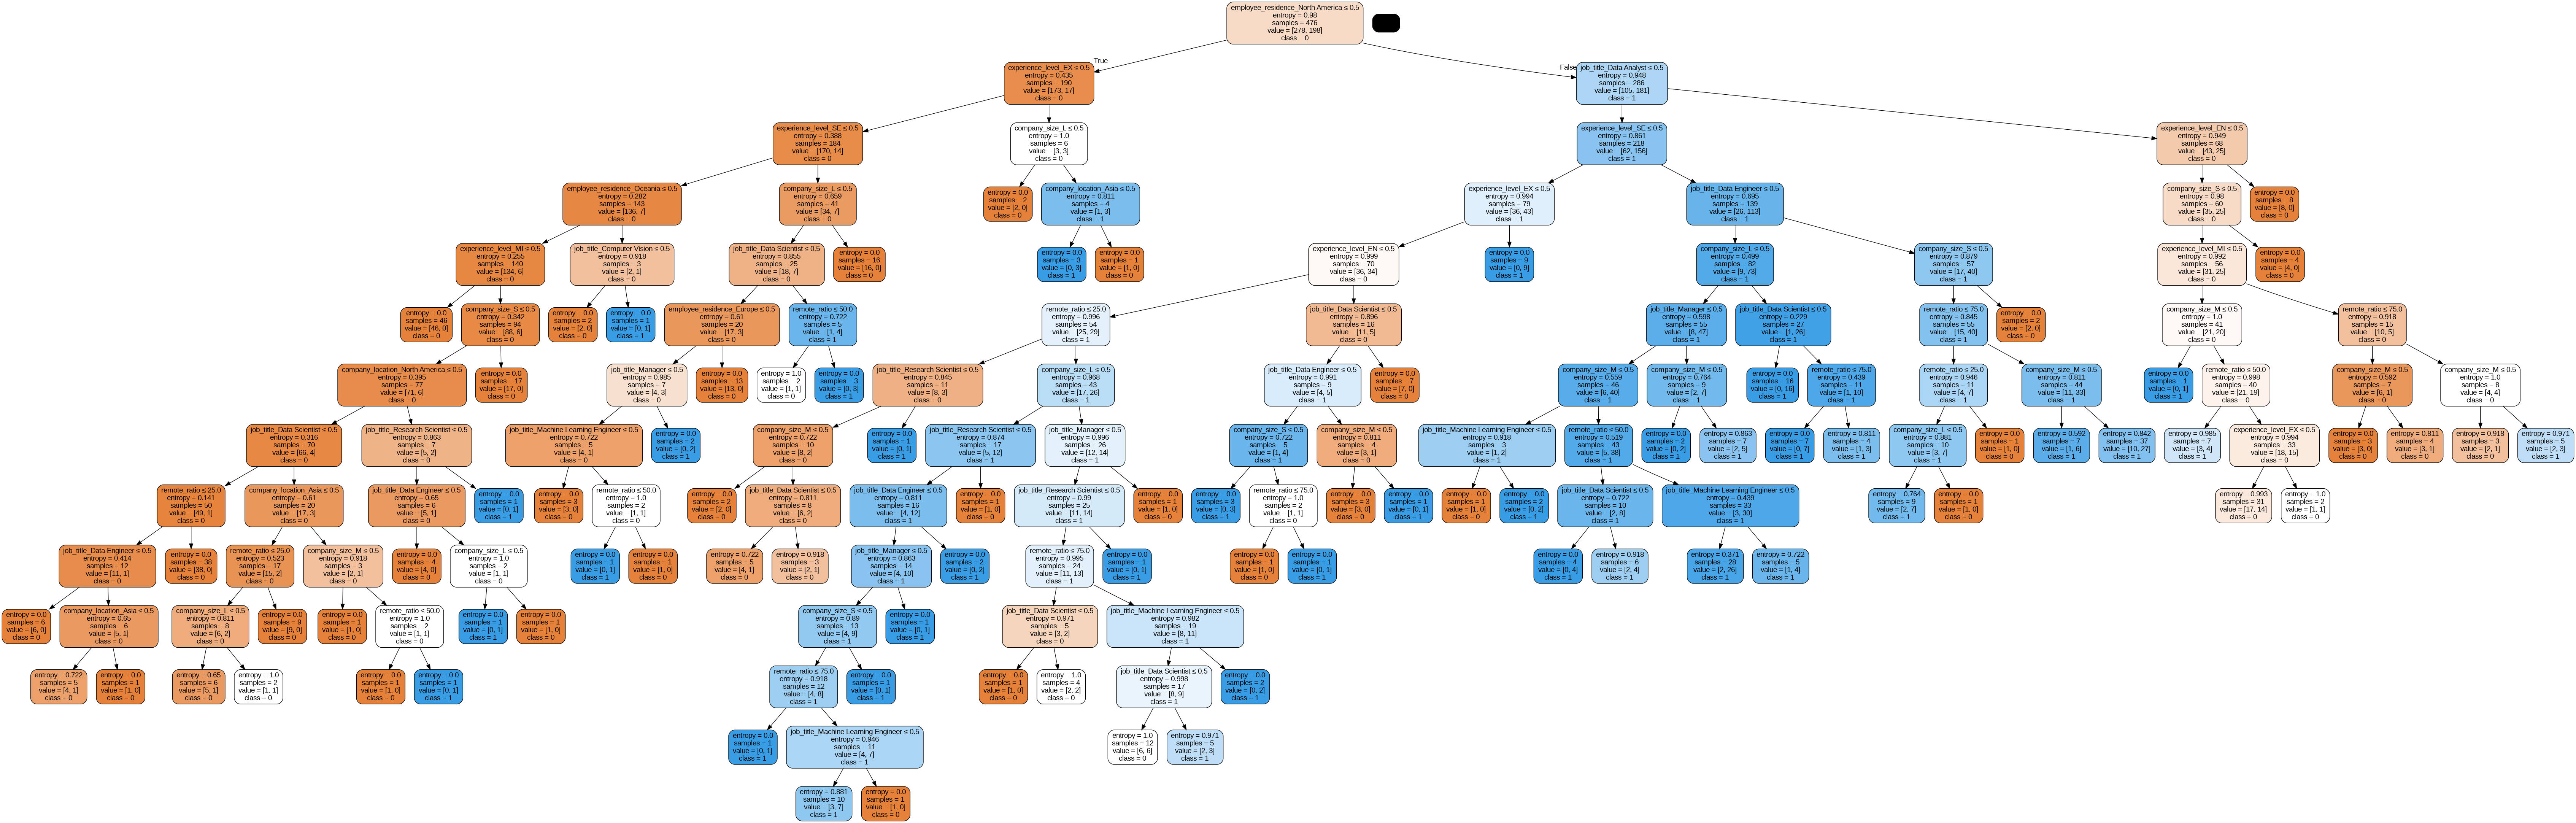

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor ,GradientBoostingRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv('/content/sample_data/salary_ID3.csv')
salary = df['salary_in_usd']
X = salary.values.reshape(-1, 1)

# Bước 4: Áp dụng K-means
K = 2  # Số cụm bạn muốn tạo
kmeans = KMeans(n_clusters=K)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_

# Bước 2: Sắp xếp tâm cụm theo thứ tự tăng dần
sorted_cluster_centers = sorted(cluster_centers)

# Bước 3: Xác định thứ tự (indices) của tâm cụm sau khi sắp xếp
sorted_indices = sorted(range(len(cluster_centers)), key=lambda x: cluster_centers[x])

# Bước 4: Sắp xếp labels dựa trên thứ tự của tâm cụm sau khi sắp xếp
labels = kmeans.labels_
sorted_labels = [sorted_indices.index(label) for label in labels]

# Gán labels đã sắp xếp vào DataFrame
df['cluster'] = sorted_labels
# Hiển thị biểu đồ phân cụm

# Hiển thị thông tin về từng cụm
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['salary_in_usd'])

df.drop(columns=[ 'salary_in_usd' ] , inplace= True )
factors = ["experience_level", "job_title", "employee_residence","company_location", "company_size"]

data1 = pd.get_dummies(df, columns = factors)
#print(data1.columns)
#print(data1.head(10))
data1.drop(columns=[ 'cluster' ] , inplace= True )
X1 = data1
Y1 = df['cluster']
#print(Y1)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")
#clf = DecisionTreeClassifier(criterion="gini")
#clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X1_train, Y1_train)

#Predict the response for test dataset
Y_pred = clf.predict(X1_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y1_test, Y_pred))

print("Chiều cao của cây:", clf.tree_.max_depth)
print("Số lượng nút lá:", clf.tree_.n_leaves)
print("Số lượng nút trong cây:", clf.tree_.node_count)
feature_cols = X1.columns
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=feature_cols,
                          class_names=[str(label) for label in clf.classes_],
                          filled=True, rounded=True, special_characters=True)

# Create a PydotPlus graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree graph as an image
Image(graph.create_png())


